In [1]:
import os
import pandas as pd

def get_parquet_files(root_folder):
    parquet_files = []
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith(".parquet"):
                parquet_files.append(os.path.join(root, file))
    return parquet_files

root_folder = '../test/'
parquet_files = get_parquet_files(root_folder)
print(parquet_files)
transactions = pd.concat([pd.read_parquet(parquet_file) for parquet_file in parquet_files])
transactions.reset_index(inplace=True)
transactions.head()

['../test/order_datetime=2021-02-28\\part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-03-01\\part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-03-02\\part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-03-03\\part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-03-04\\part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-03-05\\part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-03-06\\part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-03-07\\part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-03-08\\part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-03-09\\part-0000

,index,user_id,merchant_abn,dollar_value,order_id
0,0,1,28000487688,133.226894,0c37b3f7-c7f1-48cb-bcc7-0a58e76608ea
1,1,18485,62191208634,79.131400,9e18b913-0465-4fd4-92fd-66d15e65d93c
2,2,1,83690644458,30.441348,40a2ff69-ea34-4657-8429-df7ca957d6a1
3,3,18488,39649557865,962.813341,f4c1a5ae-5b76-40d0-ae0f-cb9730ac325a
4,4,2,80779820715,48.123977,cd09bdd6-f56d-489f-81ea-440f4bda933c


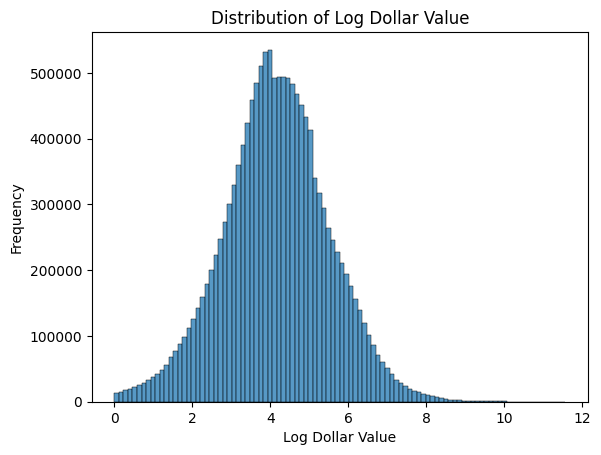

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the distribution of the 'dollar_value' column
sns.histplot(np.log1p(transactions['dollar_value']), bins=100)
plt.title('Distribution of Log Dollar Value')
plt.xlabel('Log Dollar Value')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Count the number of null values in the 'dollar_value' column
null_count = transactions['dollar_value'].isnull().sum()

# Count the number of negative values in the 'dollar_value' column
negative_count = (transactions['dollar_value'] < 0).sum()

# Count the number of values between 0 and 5
zero_5 = ((transactions['dollar_value'] >= 0) & (transactions['dollar_value'] <= 5)).sum()
five_10 = ((transactions['dollar_value'] > 5) & (transactions['dollar_value'] <= 10)).sum()
ten_50 = ((transactions['dollar_value'] > 10) & (transactions['dollar_value'] <= 50)).sum()
fifty_100 = ((transactions['dollar_value'] > 50) & (transactions['dollar_value'] <= 100)).sum()
hundred_500 = ((transactions['dollar_value'] > 100) & (transactions['dollar_value'] <= 500)).sum()
five_hundred_1000 = ((transactions['dollar_value'] > 500) & (transactions['dollar_value'] <= 1000)).sum()
thousand_plus = (transactions['dollar_value'] > 1000).sum()

# Print the counts
print("Number of null values in 'dollar_value':", null_count)
print("Number of negative values in 'dollar_value':", negative_count)
print("Number of values between 0 and 5:", zero_5)
print("Number of values between 5 and 10:", five_10)
print("Number of values between 10 and 50:", ten_50)
print("Number of values between 50 and 100:", fifty_100)
print("Number of values between 100 and 500:", hundred_500)
print("Number of values between 500 and 1000:", five_hundred_1000)
print("Number of values greater than 1000:", thousand_plus)

Number of null values in 'dollar_value': 0
Number of negative values in 'dollar_value': 0
Number of values between 0 and 5: 638997
Number of values between 5 and 10: 719275
Number of values between 10 and 50: 4782217
Number of values between 50 and 100: 2947030
Number of values between 100 and 500: 4197893
Number of values between 500 and 1000: 600916
Number of values greater than 1000: 309177
